<a href="https://colab.research.google.com/github/AjinJayan/AJ/blob/master/clustering%20Analytics%20Vidya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!unzip -q '/content/10__K-Means_Implementation.zip'

In [0]:
import pandas as pd
data=pd.read_csv('daa.csv')

In [3]:
data.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [4]:
data.isnull().sum()

instr         0
class         0
nb.repeat     0
attendance    0
difficulty    0
Q1            0
Q2            0
Q3            0
Q4            0
Q5            0
Q6            0
Q7            0
Q8            0
Q9            0
Q10           0
Q11           0
Q12           0
Q13           0
Q14           0
Q15           0
Q16           0
Q17           0
Q18           0
Q19           0
Q20           0
Q21           0
Q22           0
Q23           0
Q24           0
Q25           0
Q26           0
Q27           0
Q28           0
dtype: int64

In [5]:
data.dtypes

instr         int64
class         int64
nb.repeat     int64
attendance    int64
difficulty    int64
Q1            int64
Q2            int64
Q3            int64
Q4            int64
Q5            int64
Q6            int64
Q7            int64
Q8            int64
Q9            int64
Q10           int64
Q11           int64
Q12           int64
Q13           int64
Q14           int64
Q15           int64
Q16           int64
Q17           int64
Q18           int64
Q19           int64
Q20           int64
Q21           int64
Q22           int64
Q23           int64
Q24           int64
Q25           int64
Q26           int64
Q27           int64
Q28           int64
dtype: object

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)

In [0]:
da=pd.DataFrame(scaled_data,columns=data.columns)

In [14]:
da.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,-2.06785,-1.430719,-0.402174,-1.136118,0.901862,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,-0.032667,-0.130814,-0.071143,-0.141932,-0.027241,-0.192062,-0.231739,-0.229275,-0.131677,-0.314382,-0.173877,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
1,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,-0.032667,-0.130814,-0.071143,-0.141932,-0.027241,-0.192062,-0.231739,-0.229275,-0.131677,-0.314382,-0.173877,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
2,-2.06785,-1.430719,-0.402174,0.219954,0.901862,1.543745,1.49876,1.453023,1.492837,1.481107,1.477798,1.511882,1.525729,1.445452,1.497239,1.402075,1.504551,1.390102,1.361550,1.366876,1.421233,1.263627,1.389003,1.370552,1.342957,1.332907,1.326612,1.413075,1.436873,1.342258,1.399225,1.428430,1.323265
3,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,-0.032667,-0.130814,-0.071143,-0.141932,-0.027241,-0.192062,-0.231739,-0.229275,-0.131677,-0.314382,-0.173877,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
4,-2.06785,-1.430719,-0.402174,-1.136118,-1.322221,-1.439189,-1.61374,-1.738145,-1.621254,-1.646630,-1.645501,-1.615594,-1.591064,-1.707080,-1.639525,-1.685938,-1.559033,-1.774225,-1.825028,-1.825426,-1.684588,-1.892390,-1.736757,-1.783194,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160


In [0]:
from sklearn.cluster import KMeans

In [0]:
sse=[]
for i in range(1,20):
  kmeans=KMeans(n_jobs=-1,n_clusters=i)
  kmeans.fit(da)
  sse.append(kmeans.inertia_)


In [0]:
fa=pd.DataFrame({'inertia':sse,'k':range(1,20)})

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

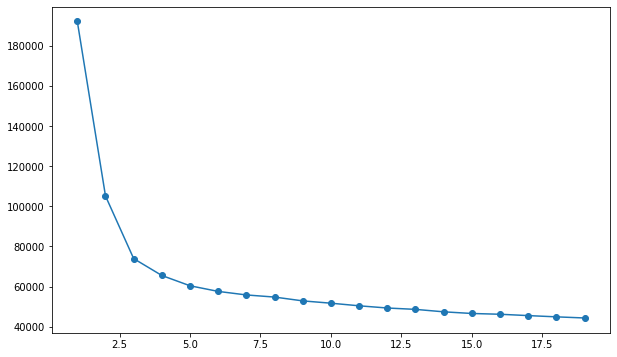

In [34]:
plt.figure(figsize=(10,6))
plt.plot(fa['k'],fa['inertia'],marker='o')


In [35]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(da)
kmeans.inertia_

65555.53222475754

In [0]:
temp=kmeans.predict(da)

In [38]:
pd.Series(temp).value_counts()

2    2101
0    1669
1    1196
3     854
dtype: int64

In [0]:
da['clusters']=temp

In [44]:
da.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,clusters
0,-2.06785,-1.430719,-0.402174,-1.136118,0.901862,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,-0.032667,-0.130814,-0.071143,-0.141932,-0.027241,-0.192062,-0.231739,-0.229275,-0.131677,-0.314382,-0.173877,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,2
1,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,-0.032667,-0.130814,-0.071143,-0.141932,-0.027241,-0.192062,-0.231739,-0.229275,-0.131677,-0.314382,-0.173877,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,2
2,-2.06785,-1.430719,-0.402174,0.219954,0.901862,1.543745,1.49876,1.453023,1.492837,1.481107,1.477798,1.511882,1.525729,1.445452,1.497239,1.402075,1.504551,1.390102,1.361550,1.366876,1.421233,1.263627,1.389003,1.370552,1.342957,1.332907,1.326612,1.413075,1.436873,1.342258,1.399225,1.428430,1.323265,3
3,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,-0.032667,-0.130814,-0.071143,-0.141932,-0.027241,-0.192062,-0.231739,-0.229275,-0.131677,-0.314382,-0.173877,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,2
4,-2.06785,-1.430719,-0.402174,-1.136118,-1.322221,-1.439189,-1.61374,-1.738145,-1.621254,-1.646630,-1.645501,-1.615594,-1.591064,-1.707080,-1.639525,-1.685938,-1.559033,-1.774225,-1.825028,-1.825426,-1.684588,-1.892390,-1.736757,-1.783194,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160,1
